# Relative Frequency

- TODO - investigate top words, adapt Eleanor text

In [3]:
%matplotlib inline
from htrc_features import FeatureReader

In [27]:
fr = FeatureReader('data/sample-file1.json.bz2')
vol = fr.first()
tokens = vol.tokenlist(pages=False, pos=False, case=False)
tokens = tokens.loc['body'] # Only focus on section='body'

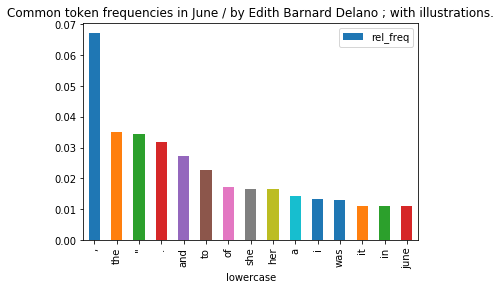

In [28]:
tokens['rel_freq'] = tokens['count'] / tokens['count'].sum()
tokens = tokens.sort_values('rel_freq', ascending=False)
tokens.head(15).plot(y='rel_freq', kind='bar', title='Common token frequencies in ' + vol.title)

In [29]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

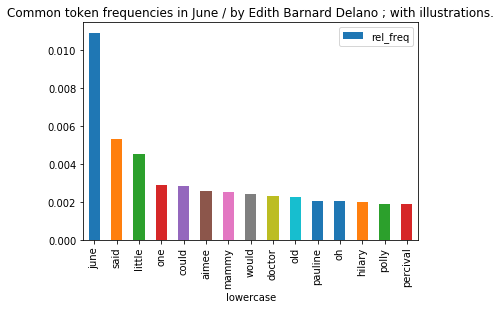

In [31]:
subset = tokens[~tokens.index.isin(stopwords.words('english')) & tokens.index.str.isalpha()]
subset.head(15).plot(y='rel_freq', kind='bar', title='Common token frequencies in ' + vol.title)

## Focusing only on a Part of Speech

In [44]:
tokens = vol.tokenlist(pages=False, pos=True, case=True).loc['body']
tokens.loc[(slice(None), ('NNP')),].sort_values('count', ascending=False)

,,count
token,pos,
",",",",3249
the,DT,1565
.,.,1532
and,CC,1249
to,TO,1086
"""",'',858
of,IN,821
"""",``,808
she,PRP,700


## TODO: Comparative frequency